## Summary

### Verified Data Analysis
The dataset contains both verified and unverified reviews. To ensure the accuracy and reliability of the analysis, the project will focus exclusively on verified reviews.

Before discarding the unverified reviews, a comparative analysis was conducted to determine if there are significant differences between verified and unverified reviews concerning the dataset's target variables. Descriptive statistics, a bar chart and a contingency table with percentages of recommendations suggest that unverified reviews tend to be more positive than verified reviews. This observation is confirmed through statistical tests. 

This analysis indicates that including unverified reviews in the project could positively bias the results, supporting the decision to exclude them. Additionally, the percentage of unverified reviews across all airlines (ranging from 19% to 29%) ensures that their exclusion would not disproportionately impact specific airlines.

### Targets Analysis for Verified Reviews
Before conducting a comprehensive Exploratory Data Analysis (EDA), it is essential to examine the target variables: 'Overall Rating' and 'Recommended'. These features summarize customer satisfaction and determine client retention.

Ae expected, both variables are clearly correlated. This result is extracted from descriptive statistics, a bar chart and Pearson's correlation coefficient. Several exceptions can be observed, where reviews with high scores are then not recommended and vice versa. Special attention should be given to these reviews in the future Sentiment Analysis to understand the motivation behind recommendations in exceptional cases.

Finally, the pie chart displaying the percentage of reviews for each value of 'Overall Rating' shows how strong reviews are polarized, with almost 65% of them being rated as 1, 2, 9 or 10. Leaving a review after a flight is an optional activity, so it makes sense that customers with exceptional positive or negative experiences will be more willing to take the time and effort to do it.

## Libraries

In [4]:
import pandas as pd # Data manipulation
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Advanced data visualization
sns.set() # Setting default Seaborn style for visualizations
import scipy.stats as stats # Perform statistical test

## Data

The cleaned dataset with engineered features is stored in the 'data/interim' directory within this repository. The path has been included to run the code without further modifications.

In [5]:
df= pd.read_csv('../data/interim/airlines_preprocessed.csv', index_col = 0)

In [6]:
df.head()

,Title,Reviews,Frequent Reviewer,Verified,Airline,Class,Type of Traveller,Route,Review Date,Flight Year,Flight Month,Quick Review,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Flight was amazing. The crew onboard this fl...,0,1,Singapore Airlines,Business Class,Solo Leisure,Jakarta to Singapore,2024-03-01,2023,12,0,4,4,4,4,4,9,1
1,seats on this aircraft are dreadful,Booking an emergency exit seat still meant h...,1,1,Singapore Airlines,Economy Class,Solo Leisure,Phuket to Singapore,2024-02-21,2024,2,1,5,3,4,4,1,3,0
2,Food was plentiful and tasty,Excellent performance on all fronts. I would...,2,1,Singapore Airlines,Economy Class,Family Leisure,Siem Reap to Singapore,2024-02-20,2024,2,1,1,5,2,1,5,10,1
3,“how much food was available,Pretty comfortable flight considering I was f...,0,1,Singapore Airlines,Economy Class,Solo Leisure,Singapore to London Heathrow,2024-02-19,2024,2,1,5,5,5,5,5,10,1
4,“service was consistently good”,The service was consistently good from start ...,0,1,Singapore Airlines,Economy Class,Family Leisure,Singapore to Phnom Penh,2024-02-19,2024,2,1,5,5,5,5,5,10,1


## Verified Analysis

### Overall Rating Analysis

#### Descriptive statistics:

Unverified reviews show a better average overall rating (0.25 difference of means) with a smaller dispersion (0.057 difference of standard deviations).
A statistical test will be performed to determine if both groups are statistically different.

In [7]:
# Summary statistics for verified vs non-verified reviews
summary_stats = df.groupby('Verified')['Overall Rating'].describe()
print(summary_stats)

           count      mean       std  min  25%  50%  75%   max
Verified                                                      
0         1883.0  5.827934  3.478051  1.0  2.0  7.0  9.0  10.0
1         6217.0  5.573267  3.535508  1.0  2.0  6.0  9.0  10.0


#### Bar chart:

A bar chart displaying the amount of verified and unverified reviews shows that both follow a similar distribution. The biggest difference resides in the smaller proportion of verified reviews with a score of 10, contributing to the worse Overall Rating mean. 

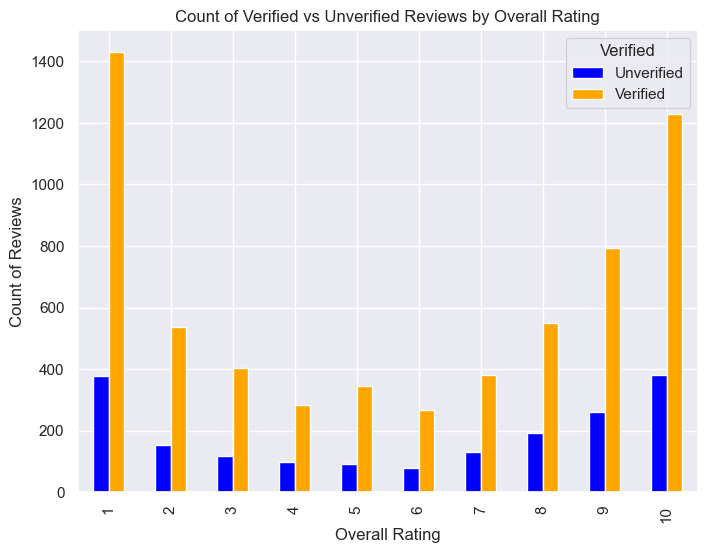

In [8]:
# Creating the pivot table
pivot_table = df.pivot_table(index='Overall Rating', columns='Verified', aggfunc='size')

# Creating the chart
ax = pivot_table.plot(kind='bar', stacked=False, color=['blue', 'orange'], figsize=(8,6))

# Customizing the chart
ax.set_title('Count of Verified vs Unverified Reviews by Overall Rating')
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Count of Reviews')
plt.legend(title='Verified', labels=['Unverified', 'Verified'])

# Plotting the chart
plt.show()

#### Statistical Test
The descriptive statistics and bar graph suggest that unverified reviews are overall more positive than verified reviews. A statistical test is performed to check whether the difference is statistically significant.

In order to select which test is more appropiated, some assumptions need to be checked.

##### Normality Assumption:
The previous bar chart suggests that the data does not follow a normal distribution. In order to verify this assumption:

Shapiro-Wilk test: The p-value of 0.000 for both distributions indicates that, at any significance level, the null hypothesis of samples coming from a normal distribution can be rejected.

Q-Q plots: Shapiro-Wilk test may be innacurate for big sample sizes (over 5000 for verified reviews). To assure the results are accurate, Q-Q plots are displayed. It can be observed that the samples don't follow the 45 degree line, with most of them being in the extreme values (1 and 10). Distributions are confirmed to not be normal.

In [10]:
# Split the data into verified and unverified reviews
for i, verified in enumerate(df['Verified'].unique()):
    # Shapiro-Wilk Test
    shapiro_test = stats.shapiro(df[df['Verified']==verified]['Overall Rating']);
    if verified==0:
        print(f"Shapiro-Wilk Test for Unverified Reviews: Statistic={shapiro_test[0]:.5f}, p-value={shapiro_test[1]:.5f}");
    else:
        print(f"Shapiro-Wilk Test for Verified Reviews: Statistic={shapiro_test[0]:.5f}, p-value={shapiro_test[1]:.5f}");

Shapiro-Wilk Test for Verified Reviews: Statistic=0.84885, p-value=0.00000
Shapiro-Wilk Test for Unverified Reviews: Statistic=0.85293, p-value=0.00000


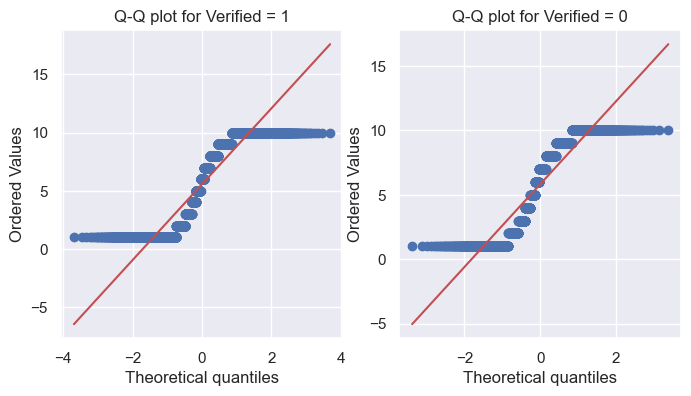

In [11]:
# Creating subplots to display both plots together
fig, axes = plt.subplots(1,2,figsize=(8,4))

# Split the data into verified and unverified reviews
for i, verified in enumerate(df['Verified'].unique()):
    # Creating Q-Q plots
    stats.probplot(df[df['Verified']==verified]['Overall Rating'],dist='norm',plot=axes[i])
    axes[i].set_title(f'Q-Q plot for Verified = {verified}')

plt.show()

##### Mann-Whitney U test:
Due to the non-normal distributions of the two independent groups, the non-parametric Mann-Whitney U test is performed. The null hypothesis is that the distributions of overall ratings for verified and unverified reviews are equal. The alternative hypothesis is that the distribution of overall ratings for unverified reviews is stochastically greater than the one for verified reviews.

The p-value shows that the null hypothesis can be rejected at a significance level of 0.5%. This result suggests that the distribution of overall ratings for unverified reviews is statistically significantly greater than the one for verified reviews.

In [12]:
# Splitting the data into verified and unverified reviews
verified_ratings = df[df['Verified'] == 1]['Overall Rating']
unverified_ratings = df[df['Verified'] == 0]['Overall Rating']

# Performing the Mann-Whitney U Test
stat, p_value = stats.mannwhitneyu(unverified_ratings, verified_ratings, alternative='greater')

# Displaying the results
print(f'Mann-Whitney U test statistic: {stat}')
print(f'P-value: {p_value}')

Mann-Whitney U test statistic: 6079434.5
P-value: 0.005026581927660268


### Recommended Analysis

#### Percentage of recommendations
After observing that unverified reviews could bias the analysis towards the positive side in terms of 'Overall Rating', it is mandatory to investigate whether the same trend happens with the 'Recommended' feature. A contingency table for 'Verified' and 'Recommended' variables is created, adding a third column showing the percentage of recommended reviews.

In [13]:
# Creating the contingency table
contingency_table = pd.crosstab(df['Verified'], df['Recommended'])

# Calculating and adding the percentages of recommended reviews
contingency_table['Percentage'] = (contingency_table[1] / (contingency_table[0]+contingency_table[1] )) * 100
contingency_table

Recommended,0,1,Percentage
Verified,,,
0,837,1046,55.549655
1,2976,3241,52.131253


#### Statistical test
The percentages displayed in the contingency table suggest that, once again, unverified reviews tend to be more positive than verified reviews.
To test this observation statistically, a Chi-Square test of independence is performed. This test compares if the proportion of recommended reviews is the same for both verified and unverified reviews.

The p-value of approximately 0.01 suggests that, at a 1% significance level, the proportions of recommended reviews across verified and unverified reviews are statistically significantly different. These findings are consistent with the results obtained from the analysis of Overall Rating, indicating that unverified reviews may indeed bias the analysis towards a more positive outcome.

In [14]:
# Perform the Chi-Square test using only the first two columns of the contingency table (excluding 'Percentage')
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table.iloc[:, :-1])

# Displaying the results
print(f'Chi-Square test statistic: {chi2_stat}')
print(f'P-value: {p_value}')

Chi-Square test statistic: 6.642121535456443
P-value: 0.009959526096220596


### Unverified reviews per Airline
The percentage of unverified reviews across all airlines is analyzed to ensure that their exclusion would not disproportionately impact specific airlines. It can be observed in the graph that this percentage ranges from 19% to 29%. This relatively narrow range suggests that unverified reviews are fairly evenly distributed, making the exclusion of unverified reviews to be considered acceptable for the analysis.

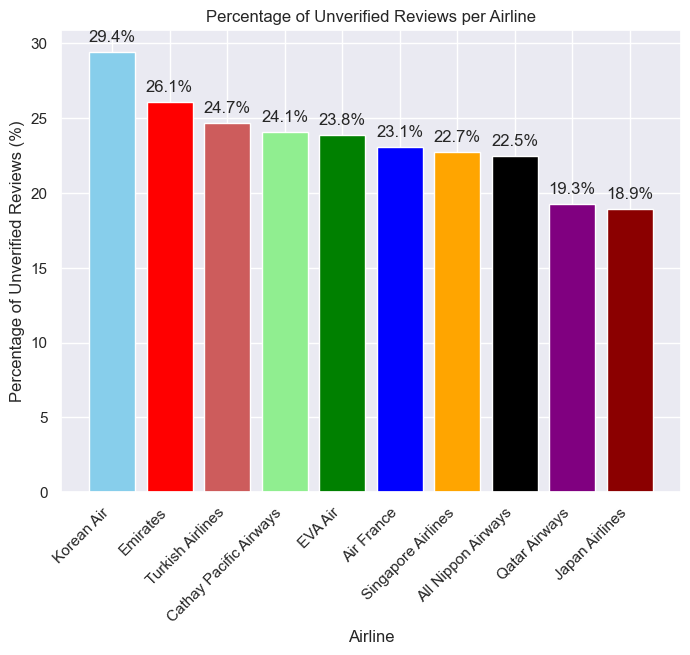

In [15]:
# Filtering only unverified reviews
unverified_counts = df[df['Verified'] == 0].groupby('Airline').size()

# Total reviews per airline
total_counts = df.groupby('Airline').size()

# Percentage of unverified reviews
percentage_unverified = (unverified_counts / total_counts) * 100

# Sorting airlines by percentage of unverified reviews (from highest to lowest)
percentage_unverified = percentage_unverified.sort_values(ascending=False)

# Defining a color map for the airlines
airline_color_map = {
    'Emirates': 'red',
    'Qatar Airways': 'purple',
    'All Nippon Airways':'black',
    'EVA Air' :'green',
    'Japan Airlines':'darkred',
    'Singapore Airlines':'orange',
    'Cathay Pacific Airways':'lightgreen',
    'Air France':'blue',
    'Turkish Airlines':'indianred',
    'Korean Air':'skyblue'
}

# Ordering airlines based on the sorted percentage
ordered_airlines = [airline for airline in percentage_unverified.index if airline in airline_color_map.keys()]

# Creating the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(ordered_airlines, percentage_unverified[ordered_airlines], 
               color=[airline_color_map[airline] for airline in ordered_airlines])

# Adding percentage values on top of the bars
for bar, percentage in zip(bars, percentage_unverified[ordered_airlines]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{percentage:.1f}%', ha='center', va='bottom')

# Customizing the chart
plt.title('Percentage of Unverified Reviews per Airline')
plt.xlabel('Airline')
plt.ylabel('Percentage of Unverified Reviews (%)')
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

## Targets Analysis for Verified Reviews

In [16]:
# Extracting verified reviews
df = df[df['Verified'] == 1]

### Overall Rating vs Recommended
To initially compare the target variables, the descriptive statistics for 'Overall Rating' segmented by recommended and not recommended reviews are displayed. It can be observed from the count of reviews that they are fairly balanced. This could already be observed in the previous 'Verified Analysis', where verified reviews showed a 52% of recommendations. The average rating is 2.33 for not recommended reviews and 8.55 for recommended ones. It seems logical that customers recommending an airline would provide a high overall score, while not recommending passengers would do the opposite. This can be observed in the bar chart displaying the amount of reviews for each value of Overall Rating split by Recommended. The Pearson's correlation coefficient of 0.880 indicates again a strong positive relationship.

              count      mean       std  min  25%  50%   75%   max
Recommended                                                       
0            2976.0  2.326277  1.705570  1.0  1.0  2.0   3.0  10.0
1            3241.0  8.554767  1.653516  1.0  8.0  9.0  10.0  10.0


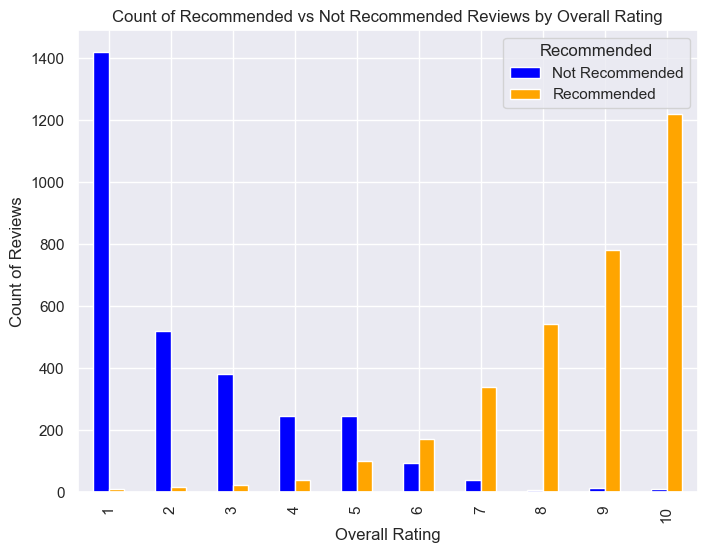

In [18]:
# Summary statistics for 'Overall Rating' vs 'Recommended'
summary_stats = df.groupby('Recommended')['Overall Rating'].describe()
print(summary_stats)

# Plotting the count of recommended and not recommended reviews by Overall Rating
pivot_table = df.pivot_table(index='Overall Rating', columns='Recommended', aggfunc='size', fill_value=0)
ax = pivot_table.plot(kind='bar', stacked=False, color=['blue', 'orange'], figsize=(8,6))
ax.set_title('Count of Recommended vs Not Recommended Reviews by Overall Rating')
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Count of Reviews')
plt.legend(title='Recommended', labels=['Not Recommended', 'Recommended'])
plt.show()

In [19]:
# Correlation coefficient between 'Overall Rating' and 'Recommended'
correlation = df[['Overall Rating', 'Recommended']].corr().iloc[0, 1]
print(f"Correlation between 'Overall Rating' and 'Recommended': {correlation:.3f}")

Correlation between 'Overall Rating' and 'Recommended': 0.880


#### Exceptions
Despite the strong correlation between 'Overall Rating' and 'Recommended', some exceptions exist where the rating does not align with the recommendation. In the future Sentiment Analysis it will be interesting to pay special attention to these, since they could provide meaningful insights on some customers preferences. The number of these exception reviews for each case is displayed below.

In [20]:
# Count of negative (positive) reviews marked as recommended (not recommended)
rating_counts = df.groupby('Recommended')['Overall Rating'].value_counts()

low_ratings_recommended = rating_counts.loc[1, [1, 2, 3]]
high_ratings_not_recommended = rating_counts.loc[0, [8, 9, 10]]
print(f"Low ratings (1-3) recommended reviews:\n{low_ratings_recommended}")
print(f"High ratings (8-10) not recommended reviews:\n{high_ratings_not_recommended}")

Low ratings (1-3) recommended reviews:
Recommended  Overall Rating
1            1                 10
             2                 17
             3                 22
Name: count, dtype: int64
High ratings (8-10) not recommended reviews:
Recommended  Overall Rating
0            8                  7
             9                 13
             10                 9
Name: count, dtype: int64


### Percentage of reviews per Overall Rating score
The pie chart below ilustrates the percentage of reviews across the different Overall Rating values. It shows how strongly polarized reviews are, with almost 43% of them being either 1 or 10, and almost 65% of them being either 1,2,9 or 10. This can help understand the motivation of customers when deciding to leave a review, with most of them having an exceptional positive or negative impression when doing so.

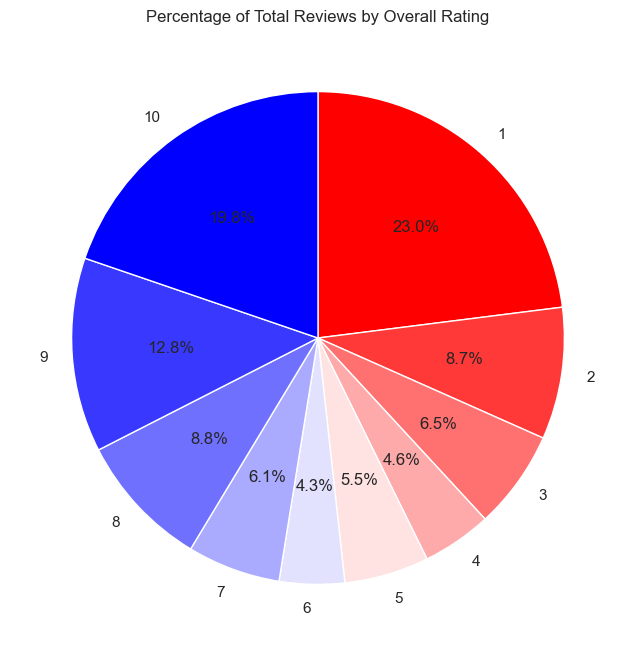

In [21]:
# Calculate the percentage of total reviews for each 'Overall Rating'
rating_counts = df['Overall Rating'].value_counts(normalize=True).sort_index() * 100

# Create a color gradient from red to blue
colors = [plt.cm.bwr(1 - i / (len(rating_counts) - 1)) for i in range(len(rating_counts))]

# Plot the pie chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors)
ax.set_title('Percentage of Total Reviews by Overall Rating')
plt.show()